## Objective

- Summarization has been and continues to be a hot topic in Data Science and AI Communities.
- In May 2018, the largest summarization dataset is reveled in a project supported by Google Research.
- One of the challenges with summarization is that is hard to genralize. Example, summarizing a news article is very difficult than summarizing financial earning report.
- Even though there is intense activity in the research field, there is less literature available regarding real world applications of AI-driven summarization.
- For this reason, the way summarization works largely depends on the use case and there is no one-size-fits-all solution.

## Summarization: The Basics

There are two main approaches to summarization:
- Extractive Summarization: it works by selecting the most meaning ful sentences in an article and arranging them in a comprehensive manner. This means the summary sentences are extracted from the articale.
- Abstractive Summarization: it works by paraphrasing its own version of the most important sentence in the article.

### **Approaches to Extractive Summarization:**

*   Topic Representation Approaches
    * Topic words
    * Frequency-driven approaches
    * Latent Semantic Analysis

*   Indicator representation approaches

    * Graph Methods
    * Machine Learning



### **Approaches to Abstractive Summarization:**


1.   Tree Based

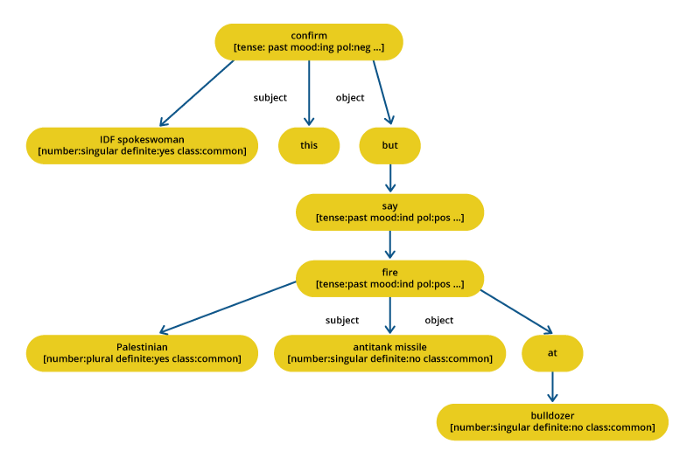

2. Template Based

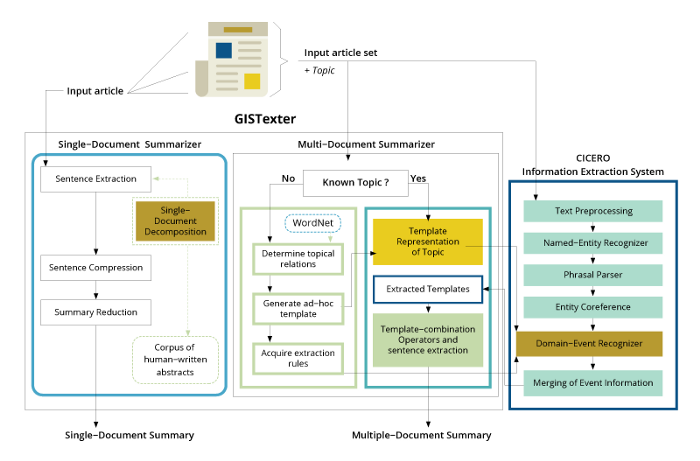

3. Graph Based

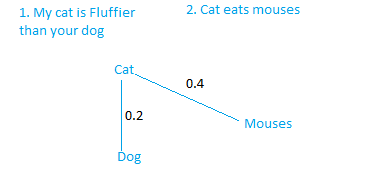


4. Semantic Graph Model


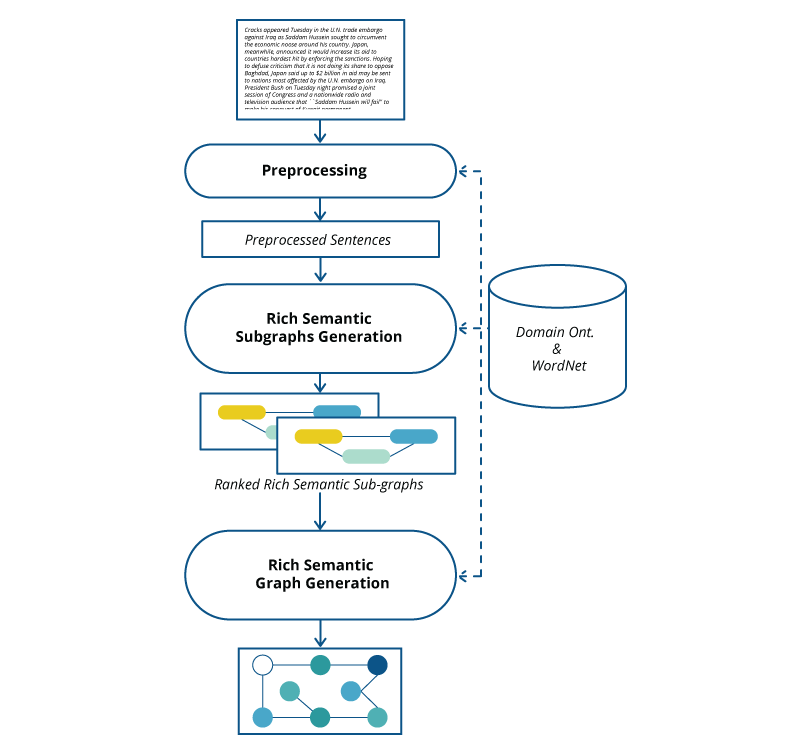


**Approach Used**

Bidirectional and Auto-Regressive Transformers

A denoising autoencoder for pretraining sequence-to-sequence models. BART is trained by:

1. Corrupting text with an arbitrary noising function
2. Learning a model to reconstruct the original text.


Few of the tasks it can solve:

1. Abstractive Dialogue
2. Question Answering
3. Summarization Tasks

# **BART Basics: Encoder - Decoder Architecture**


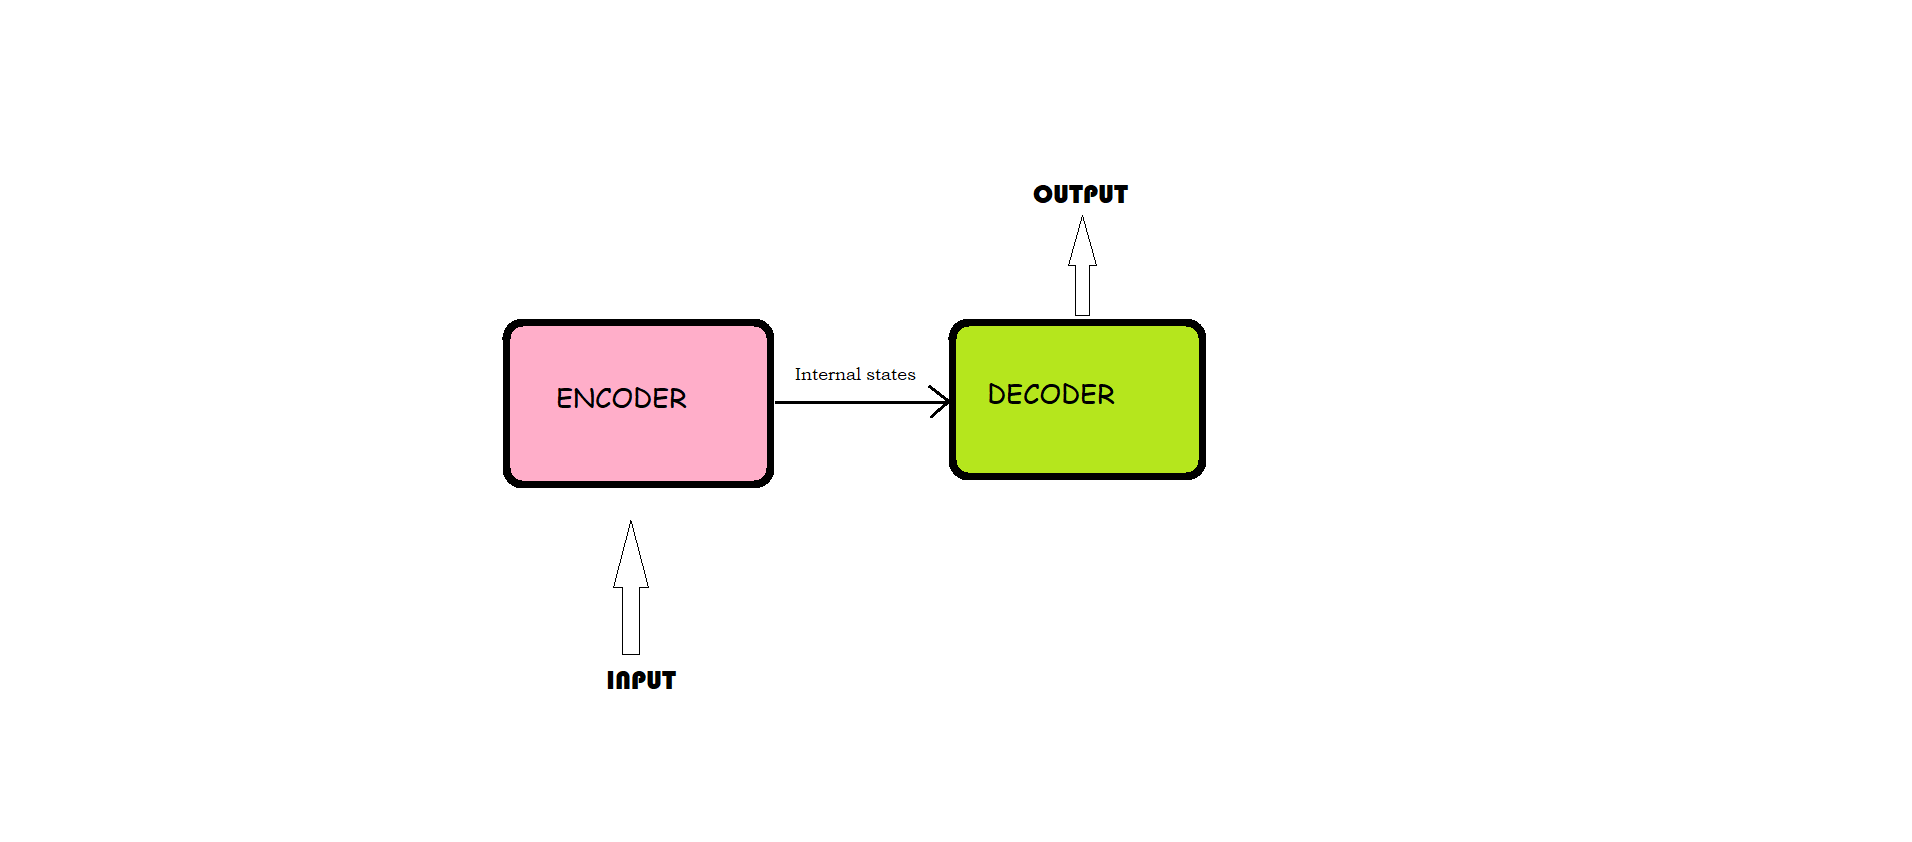

## BART Summarizatio Pre-Training: CNN/DM

In [1]:
!pip install datasets
!pip install pyarrow
!pip install transformers
!pip install pytorch_lightning
!pip install torch
!pip install scikit-learn
!pip install pandas

In [2]:
!pip install huggingface_hub


In [3]:
from datasets import load_dataset
from huggingface_hub import list_datasets

datasets_info = list_datasets(limit=10)


d:\NLPProjects\2025_ia653_juttu\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Print the first few dataset names
for ds in datasets_info:
    print(ds.id)

# Load a specific dataset (example: 'imdb')
dataset = load_dataset('imdb')
print(dataset)

nvidia/OpenCodeReasoning
open-thoughts/OpenThoughts2-1M
nvidia/Llama-Nemotron-Post-Training-Dataset
LLM360/MegaMath
agentica-org/DeepCoder-Preview-Dataset
FreedomIntelligence/medical-o1-reasoning-SFT
glaiveai/reasoning-v1-20m
fka/awesome-chatgpt-prompts
Anthropic/EconomicIndex
nisten/battlefield-medic-sharegpt
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [5]:
from datasets import get_dataset_config_names

dataset_configs = get_dataset_config_names("cnn_dailymail")
print(dataset_configs)


['1.0.0', '2.0.0', '3.0.0']


In [6]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")


Permalink: https://huggingface.co/datasets/viewer/?dataset=cnn_dailymail&config=3.0.0



In [7]:
from pprint import pprint

print(f"Currently {len(dataset)} datasets are available on the hub:")
pprint(dataset, compact=True)

Currently 3 datasets are available on the hub:
DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [8]:
dataset_ = load_dataset('cnn_dailymail', '3.0.0', split='train[:10%]') 

In [9]:
print(dataset_)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 28711
})


In [10]:
print(f"Dataset len(dataset): {len(dataset_)}")
print("\nFirst item 'dataset[0]'")
pprint(dataset_[0])

Dataset len(dataset): 28711

First item 'dataset[0]'
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe '
            'gains access to a reported £20 million ($41.1 million) fortune as '
            "he turns 18 on Monday, but he insists the money won't cast a "
            'spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter '
            'and the Order of the Phoenix" To the disappointment of gossip '
            'columnists around the world, the young actor says he has no plans '
            'to fritter his cash away on fast cars, drink and celebrity '
            'parties. "I don\'t plan to be one of those people who, as soon as '
            'they turn 18, suddenly buy themselves a massive sports car '
            'collection or something similar," he told an Australian '
            'interviewer earlier this month. "I don\'t think I\'ll be '
            'particularly extravagant. "The things I like buying are things '
            'that cost a

# **BART Pre-Training: Methodologies**

BART is pre-trained by minimizing the cross-entropy loss between the decoder output and the original sequence.


**Masked Language Modeling (MLM)**

MLM models such as BERT are pre-trained to predict masked tokens. This process can be broken down as follows:

1. Replace a random subset of the input with a mask token [MASK]. (Adding noise/corruption)
2. The model predicts the original tokens for each of the [MASK] tokens. (Denoising)

Importantly, BERT models can “see” the full input sequence (with some tokens replaced with [MASK]) when attempting to predict the original tokens. This makes BERT a bidirectional model, i.e. it can “see” the tokens before and after the masked tokens.


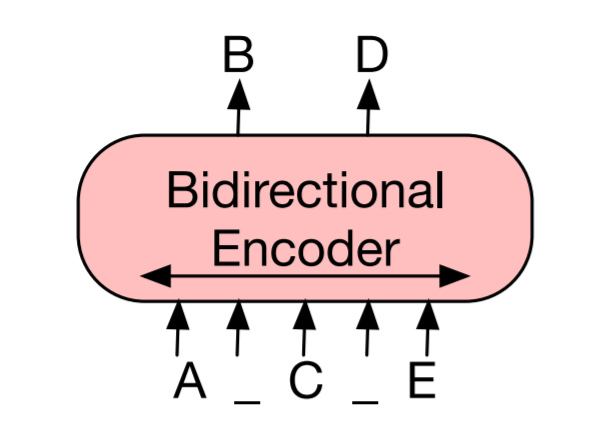

This is suited for tasks like classification where you can use information from the full sequence to perform the prediction. However, it is less suited for text generation tasks where the prediction depends only on the previous words.


**Autoregressive Models**
Models used for text generation, such as GPT2, are pre-trained to predict the next token given the previous sequence of tokens. This pre-training objective results in models that are well-suited for text generation, but not for tasks like classification.


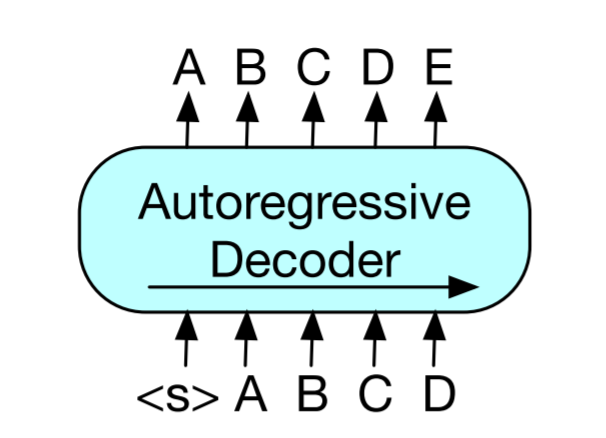

**BART Sequence-to-Sequence**

BART has both an encoder (like BERT) and a decoder (like GPT), essentially getting the best of both worlds.

The encoder uses a denoising objective similar to BERT while the decoder attempts to reproduce the original sequence (autoencoder), token by token, using the previous (uncorrupted) tokens and the output from the encoder.

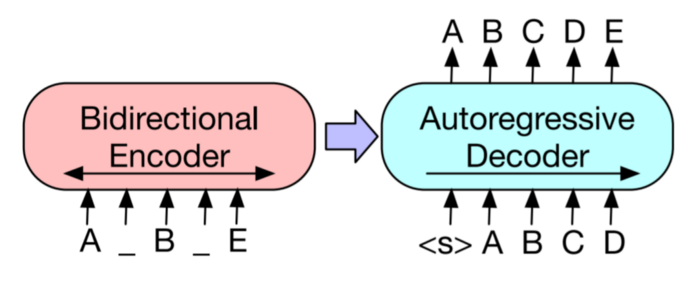

A significant advantage of this setup is the unlimited flexibility of choosing the corruption scheme; including changing the length of the original input. Or, in fancier terms, the text can be corrupted with an arbitrary noising function.

#### BART Fine-Tuning: Using Transformers

In [11]:
import torch
from torch.optim import AdamW

from transformers import (
    BartForConditionalGeneration,
    BartTokenizer,
    get_linear_schedule_with_warmup
)

from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
!nvidia-smi

Wed Apr  9 15:43:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   40C    P8              4W /  140W |    2155MiB /   8188MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
import pytorch_lightning as pl

class Dataset(torch.utils.data.Dataset):
    """Class Used a dataset loader with defined overidden methods as required by
    `pytorch` dataloader.
    
    For more information about Dataset, Dataloader read:

    https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
    """

    def __init__(self, texts, summaries, tokenizer, source_len, summ_len):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.source_len  = source_len
        self.summ_len = summ_len

    def __len__(self):
        return len(self.summaries) - 1

    def __getitem__(self, index):
        text = ' '.join(str(self.texts[index]).split())

        summary = ' '.join(str(self.summaries[index]).split())

        # Article text pre-processing
        source = self.tokenizer.batch_encode_plus([text],
                                                  max_length= self.source_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')
        # Summary Target pre-processing
        target = self.tokenizer.batch_encode_plus([summary],
                                                  max_length= self.summ_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')

        return (
            source['input_ids'].squeeze(), 
            source['attention_mask'].squeeze(), 
            target['input_ids'].squeeze(),
            target['attention_mask'].squeeze()
        )

class BARTDataLoader(pl.LightningDataModule):
    '''Pytorch Ligtning Model Dataloader class for BART'''

    def __init__(self, tokenizer, text_len, summarized_len, file_path,
                 corpus_size, columns_name, train_split_size, batch_size):
        super().__init__()
        self.tokenizer = tokenizer
        self.text_len = text_len
        self.summarized_len = summarized_len
        self.input_text_length = summarized_len
        self.file_path = file_path
        self.nrows = corpus_size
        self.columns = columns_name
        self.train_split_size = train_split_size
        self.batch_size = batch_size

    def prepare_data(self):
        data = pd.read_csv(self.file_path, nrows=self.nrows,
                               encoding='latin-1')
        data = data[self.columns]
        data.iloc[:, 1] = 'summarize: ' + data.iloc[:, 1]
        self.text =  list(data.iloc[:, 0].values)
        self.summary =  list(data.iloc[:, 1].values)

    def setup(self, stage=None):
        X_train , y_train, X_val, y_val = train_test_split(
            self.text, self.summary
        )

        self.train_dataset = (X_train, y_train) 
        self.val_dataset = (X_val, y_val)

    def train_dataloader(self):
        train_data = Dataset(texts=self.train_dataset[0],
                             summaries=self.train_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(train_data, self.batch_size)

    def val_dataloader(self):
        val_dataset = Dataset(texts=self.val_dataset[0],
                             summaries=self.val_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(val_dataset, self.batch_size)

In [19]:
class AbstractiveSummarizationBARTFineTuning(pl.LightningModule):
    """Abstractive summarization model class"""

    def __init__(self, model, tokenizer):
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer
        self.training_losses = []
        self.validation_losses = []

    def forward(self, input_ids, attention_mask, decoder_input_ids,
                decoder_attention_mask=None, lm_labels=None):
        """Model forward pass"""
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            labels=decoder_input_ids  # You’re using labels=decoder_input_ids
        )
        return outputs

    def preprocess_batch(self, batch):
        """Reformatting batch"""
        input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask = batch
        y = decoder_input_ids
        return input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask, y

    def training_step(self, batch, batch_idx):
        input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask, lm_labels = self.preprocess_batch(batch)
        outputs = self.forward(input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask, lm_labels)
        loss = outputs.loss
        self.training_losses.append(loss.detach())  # Store for epoch summary
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask, lm_labels = self.preprocess_batch(batch)
        outputs = self.forward(input_ids, source_attention_mask, decoder_input_ids, decoder_attention_mask, lm_labels)
        loss = outputs.loss
        self.validation_losses.append(loss.detach())  # Store for epoch summary
        return loss

    def on_train_epoch_end(self):
        avg_loss = torch.stack(self.training_losses).mean()
        self.log('epoch', self.current_epoch)
        self.log('avg_epoch_loss', avg_loss, prog_bar=True)
        self.training_losses.clear()

    def on_validation_epoch_end(self):
        avg_loss = torch.stack(self.validation_losses).mean()
        self.log('val_avg_epoch_loss', avg_loss, prog_bar=True)
        self.validation_losses.clear()

    def configure_optimizers(self):
        return AdamW(self.model.parameters())


In [20]:
# Tokenizer
# Upload the curated_data_subset.csv if using colab or change the path to local file
from transformers import BartForConditionalGeneration, BartTokenizer

model_ = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")


# Dataloader
dataloader = BARTDataLoader(tokenizer=tokenizer, text_len=512,
                            summarized_len=150,
                            file_path='curated_data_subset.csv',
                            corpus_size=50, columns_name=['article_content','summary'],
                            train_split_size=0.8, batch_size=2)
# Read and pre-process data
dataloader.prepare_data()

# Train-test Split
dataloader.setup()

In [21]:
# Main Model class
model = AbstractiveSummarizationBARTFineTuning(model=model_, tokenizer=tokenizer)

In [23]:
from torch.utils.data import DataLoader

trainer = pl.Trainer(
    check_val_every_n_epoch=1,
    max_epochs=5,
    accelerator="gpu",
    devices=1
)

# Fit model
trainer.fit(model, dataloader)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                         | Params | Mode
--------------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M  | eval
--------------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)
0         Modules in train mode
182       Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

d:\NLPProjects\2025_ia653_juttu\.venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

d:\NLPProjects\2025_ia653_juttu\.venv\lib\site-packages\transformers\tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


d:\NLPProjects\2025_ia653_juttu\.venv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
d:\NLPProjects\2025_ia653_juttu\.venv\lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4: 100%|██████████| 6/6 [00:01<00:00,  3.48it/s, v_num=1, val_avg_epoch_loss=7.760, avg_epoch_loss=5.380]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 6/6 [00:12<00:00,  0.46it/s, v_num=1, val_avg_epoch_loss=7.760, avg_epoch_loss=5.380]


### Summarization using Pre-Trained Mode:

In [25]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration

def summarize_article(article, model_name='facebook/bart-large-cnn', max_input_len=1024, max_output_len=150):
    # Load model and tokenizer only once if you use this function repeatedly
    tokenizer = BartTokenizer.from_pretrained(model_name)
    model = BartForConditionalGeneration.from_pretrained(model_name)

    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Tokenize and encode the article
    inputs = tokenizer.encode(article, return_tensors='pt', max_length=max_input_len, truncation=True).to(device)

    # Generate summary
    summary_ids = model.generate(
        inputs,
        num_beams=4,
        max_length=max_output_len,
        early_stopping=True
    )

    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage
article = """
My friends are cool but they eat too many carbs.
"""

summary = summarize_article(article)
print("Summary:")
print(summary)


Summary:
My friends are cool but they eat too many carbs. That's what this is all about. I don't want you to think I'm a bad person. I'm not. I just don't like to be around people who eat too much carbs. This is my way of telling you that.


In [26]:
article = '''Former U.S. President Donald Trump charged in classified documents probe
There was no immediate confirmation from the Justice Department regarding Mr. Trump’s assertion, although some U.S. media outlet cited sources saying that the former U.S. President has bee indicted'''

In [27]:
summary = summarize_article(article)
print("Summary:")
print(summary)

Summary:
Former U.S. President Donald Trump charged in classified documents probe. There was no immediate confirmation from the Justice Department regarding Mr. Trump’s assertion. Some media outlet cited sources saying that the former U.s. President has bee indicted. The Justice Department has not commented on the reports.
